<a href="https://www.kaggle.com/code/lalit7881/metacritic-movies-ratings-ml-performance?scriptVersionId=293768987" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/metacritic-movies-dataset/metacritic_movies.csv


## Title:
Metacritic Movies – Performance & Ratings Overview

## Description:
The Metacritic Movies Dataset provides structured information about films aggregated from the Metacritic platform, capturing critical reception and audience perception in a standardized format. It typically includes details such as movie titles, release years, genres, critic scores, user scores, and review counts. This dataset is widely used for analyzing trends in film quality, comparing critical acclaim versus audience response, identifying high-impact releases across years and genres, and building predictive or recommendation models in movie analytics. It serves as a valuable resource for data analysis, visualization, and machine learning projects focused on entertainment industry insights.

## Import dataset

In [2]:
file_path = "/kaggle/input/metacritic-movies-dataset/metacritic_movies.csv"
df = pd.read_csv(file_path)


In [3]:
df.head()

,id,title,releaseDate,rating,genres,description,duration,tagline,metascore,metascore_count,metascore_sentiment,userscore,userscore_count,userscore_sentiment,production_companies,director,writer,top_cast
0,2000545497,Dekalog (1988),3/22/1996,TV-MA,Drama,This masterwork by Krzysztof Kieślowski is one...,572,NaN,100.0,13,Universal acclaim,75.0,224.0,Generally favorable,"Telewizja Polska (TVP),Zespol Filmowy ""Tor"",Se...",Krzysztof Kieslowski,"Krzysztof Kieslowski,Krzysztof Piesiewicz","Artur Barcis,Olgierd Lukaszewicz,Olaf Lubaszen..."
1,2000540575,Citizen Kane,9/4/1941,PG,"Drama,Mystery","Following the death of a publishing tycoon, ne...",119,Radio's Most Dynamic Artist . . The Man At Who...,100.0,19,Universal acclaim,83.0,991.0,Universal acclaim,"RKO Radio Pictures,Mercury Productions,RKO Rad...",Orson Welles,"Herman J. Mankiewicz,Orson Welles,John Housema...","Orson Welles,Joseph Cotten,Dorothy Comingore,A..."
2,2000542176,Boyhood,7/11/2014,R,Drama,"Filmed over 12 years with the same cast, Richa...",165,12 years in the making,100.0,50,Universal acclaim,76.0,2724.0,Generally favorable,"IFC Productions,Detour Filmproduction,IFC Film...",Richard Linklater,Richard Linklater,"Ellar Coltrane,Patricia Arquette,Ethan Hawke,E..."
3,2000521589,The Leopard (re-release),8/13/2004,PG,"Drama,History","Set in Sicily in 1860, Luchino Visconti's spec...",187,Luchino Visconti's Enduring Romantic Adventure,100.0,12,Universal acclaim,77.0,125.0,Generally favorable,"Titanus,Société Nouvelle Pathé Cinéma,Société ...",Luchino Visconti,"Giuseppe Tomasi di Lampedusa,Suso Cecchi D'Ami...","Burt Lancaster,Alain Delon,Claudia Cardinale,P..."
4,2000522553,The Godfather,3/24/1972,R,"Crime,Drama",Francis Ford Coppola's epic features Marlon Br...,175,An offer you can't refuse.,100.0,16,Universal acclaim,92.0,4355.0,Universal acclaim,"Paramount Pictures,Albert S. Ruddy Productions...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","Marlon Brando,Al Pacino,James Caan,Diane Keato..."


In [4]:
df.shape

(16939, 18)

In [5]:
df.columns

Index(['id', 'title', 'releaseDate', 'rating', 'genres', 'description',
       'duration', 'tagline', 'metascore', 'metascore_count',
       'metascore_sentiment', 'userscore', 'userscore_count',
       'userscore_sentiment', 'production_companies', 'director', 'writer',
       'top_cast'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16939 entries, 0 to 16938
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    16939 non-null  int64  
 1   title                 16939 non-null  object 
 2   releaseDate           16939 non-null  object 
 3   rating                12438 non-null  object 
 4   genres                16933 non-null  object 
 5   description           16939 non-null  object 
 6   duration              16939 non-null  int64  
 7   tagline               12058 non-null  object 
 8   metascore             16929 non-null  float64
 9   metascore_count       16939 non-null  int64  
 10  metascore_sentiment   16929 non-null  object 
 11  userscore             16923 non-null  float64
 12  userscore_count       16923 non-null  float64
 13  userscore_sentiment   13496 non-null  object 
 14  production_companies  16924 non-null  object 
 15  director           

In [7]:
df.describe()

,id,duration,metascore,metascore_count,userscore,userscore_count
count,1.693900e+04,16939.000000,16929.000000,16939.000000,16923.000000,16923.000000
mean,2.000539e+09,104.493122,59.857345,19.944979,51.650239,94.457188
std,1.467066e+04,21.368719,17.041774,11.467705,28.315356,310.737174
min,2.000500e+09,0.000000,1.000000,7.000000,0.000000,0.000000
25%,2.000522e+09,92.000000,48.000000,10.000000,44.000000,5.000000
50%,2.000543e+09,101.000000,62.000000,17.000000,62.000000,16.000000
75%,2.000551e+09,113.000000,73.000000,27.000000,72.000000,63.000000
max,2.000562e+09,808.000000,100.000000,69.000000,100.000000,10454.000000


In [8]:
df.isnull().sum()

id                         0
title                      0
releaseDate                0
rating                  4501
genres                     6
description                0
duration                   0
tagline                 4881
metascore                 10
metascore_count            0
metascore_sentiment       10
userscore                 16
userscore_count           16
userscore_sentiment     3443
production_companies      15
director                  10
writer                   983
top_cast                 147
dtype: int64

In [9]:
(df.isnull().sum() / len(df)) * 100

id                       0.000000
title                    0.000000
releaseDate              0.000000
rating                  26.571817
genres                   0.035421
description              0.000000
duration                 0.000000
tagline                 28.815160
metascore                0.059035
metascore_count          0.000000
metascore_sentiment      0.059035
userscore                0.094457
userscore_count          0.094457
userscore_sentiment     20.325875
production_companies     0.088553
director                 0.059035
writer                   5.803176
top_cast                 0.867820
dtype: float64

In [10]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [11]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df = df.drop_duplicates()

In [14]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


id: 16939 unique values
title: 16319 unique values
releaseDate: 4593 unique values
rating: 13 unique values
genres: 1842 unique values
description: 16934 unique values
duration: 204 unique values
tagline: 11971 unique values
metascore: 98 unique values
metascore_count: 63 unique values
metascore_sentiment: 5 unique values
userscore: 93 unique values
userscore_count: 996 unique values
userscore_sentiment: 5 unique values
production_companies: 16898 unique values
director: 8089 unique values
writer: 13603 unique values
top_cast: 16784 unique values


In [15]:
df.sort_values(by='metascore', ascending=False).head(10)

,id,title,releaseDate,rating,genres,description,duration,tagline,metascore,metascore_count,metascore_sentiment,userscore,userscore_count,userscore_sentiment,production_companies,director,writer,top_cast
6,2000538875,Tokyo Story,3/13/1972,R,Drama,Yasujiro Ozu’s Tokyo Story follows an aging co...,136,"As long as life goes on, relationships between...",100.0,19,Universal acclaim,85.0,179.0,Universal acclaim,"Shochiku,Entertain Me Productions,New Yorker F...",Yasujirô Ozu,"Kôgo Noda,Yasujirô Ozu","Chishû Ryû,Chieko Higashiyama,Sô Yamamura,Sets..."
4,2000522553,The Godfather,3/24/1972,R,"Crime,Drama",Francis Ford Coppola's epic features Marlon Br...,175,An offer you can't refuse.,100.0,16,Universal acclaim,92.0,4355.0,Universal acclaim,"Paramount Pictures,Albert S. Ruddy Productions...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","Marlon Brando,Al Pacino,James Caan,Diane Keato..."
0,2000545497,Dekalog (1988),3/22/1996,TV-MA,Drama,This masterwork by Krzysztof Kieślowski is one...,572,Based on a true story.,100.0,13,Universal acclaim,75.0,224.0,Generally favorable,"Telewizja Polska (TVP),Zespol Filmowy ""Tor"",Se...",Krzysztof Kieslowski,"Krzysztof Kieslowski,Krzysztof Piesiewicz","Artur Barcis,Olgierd Lukaszewicz,Olaf Lubaszen..."
34,2000545507,Three Colors: Red,11/23/1994,R,"Drama,Mystery,Romance",Krzysztof Kieslowski closes his Three Colors t...,99,Based on a true story.,100.0,11,Universal acclaim,83.0,303.0,Universal acclaim,"MK2 Productions,France 3 Cinéma,CAB Production...",Krzysztof Kieslowski,"Krzysztof Piesiewicz,Krzysztof Kieslowski,Agni...","Irène Jacob,Jean-Louis Trintignant,Frédérique ..."
1,2000540575,Citizen Kane,9/4/1941,PG,"Drama,Mystery","Following the death of a publishing tycoon, ne...",119,Radio's Most Dynamic Artist . . The Man At Who...,100.0,19,Universal acclaim,83.0,991.0,Universal acclaim,"RKO Radio Pictures,Mercury Productions,RKO Rad...",Orson Welles,"Herman J. Mankiewicz,Orson Welles,John Housema...","Orson Welles,Joseph Cotten,Dorothy Comingore,A..."
2,2000542176,Boyhood,7/11/2014,R,Drama,"Filmed over 12 years with the same cast, Richa...",165,12 years in the making,100.0,50,Universal acclaim,76.0,2724.0,Generally favorable,"IFC Productions,Detour Filmproduction,IFC Film...",Richard Linklater,Richard Linklater,"Ellar Coltrane,Patricia Arquette,Ethan Hawke,E..."
3,2000521589,The Leopard (re-release),8/13/2004,PG,"Drama,History","Set in Sicily in 1860, Luchino Visconti's spec...",187,Luchino Visconti's Enduring Romantic Adventure,100.0,12,Universal acclaim,77.0,125.0,Generally favorable,"Titanus,Société Nouvelle Pathé Cinéma,Société ...",Luchino Visconti,"Giuseppe Tomasi di Lampedusa,Suso Cecchi D'Ami...","Burt Lancaster,Alain Delon,Claudia Cardinale,P..."
5,2000548059,Rear Window,9/1/1954,PG,"Drama,Mystery,Thriller",A wheelchair-bound photographer spies on his n...,112,In deadly danger...because they saw too much!,100.0,18,Universal acclaim,87.0,706.0,Universal acclaim,"Alfred J. Hitchcock Productions,Paramount Pict...",Alfred Hitchcock,"John Michael Hayes,Cornell Woolrich","James Stewart,Grace Kelly,Wendell Corey,Thelma..."
10,2000549306,Notorious,9/6/1946,R,"Drama,Film-Noir,Mystery,Romance,Thriller",A woman is asked to spy on a group of Nazi fri...,101,Notorious woman of affairs... Adventurous man ...,100.0,17,Universal acclaim,79.0,160.0,Generally favorable,"RKO Radio Pictures,Vanguard Films,RKO Radio Pi...",Alfred Hitchcock,"Ben Hecht,Alfred Hitchcock,John Taintor Foote,...","Cary Grant,Ingrid Bergman,Claude Rains,Louis C..."
8,2000546633,Casablanca,1/23/1943,PG,"Drama,Romance,War","A Casablanca, Morocco casino owner in 1941 she...",102,Where Love Cuts as Deep as a Dagger!,100.0,18,Universal acclaim,87.0,696.0,Universal acclaim,"Warner Bros.,Warner Bros.,Warner Bros. Picture...",Michael Curtiz,"Philip G. Epstein,Julius J. Epstein,Howard Koc...","Humphrey Bogart,Ingrid Bergman,Paul Henreid,Cl..."


In [16]:
df[numeric_cols].corr()

,id,duration,metascore,metascore_count,userscore,userscore_count
id,1.000000,0.015361,0.136009,-0.146220,-0.045310,-0.036781
duration,0.015361,1.000000,0.148663,0.250485,0.206694,0.217076
metascore,0.136009,0.148663,1.000000,0.113221,0.195010,0.098862
metascore_count,-0.146220,0.250485,0.113221,1.000000,0.363889,0.444018
userscore,-0.045310,0.206694,0.195010,0.363889,1.000000,0.197316
userscore_count,-0.036781,0.217076,0.098862,0.444018,0.197316,1.000000


In [17]:
def rating_label(score):
    if score >= 80:
        return "Excellent"
    elif score >= 60:
        return "Good"
    elif score >= 40:
        return "Average"
    else:
        return "Poor"

df['rating_category'] = df['metascore'].apply(rating_label)


In [18]:
df.head()
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16939 entries, 0 to 16938
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    16939 non-null  int64  
 1   title                 16939 non-null  object 
 2   releaseDate           16939 non-null  object 
 3   rating                16939 non-null  object 
 4   genres                16939 non-null  object 
 5   description           16939 non-null  object 
 6   duration              16939 non-null  int64  
 7   tagline               16939 non-null  object 
 8   metascore             16939 non-null  float64
 9   metascore_count       16939 non-null  int64  
 10  metascore_sentiment   16939 non-null  object 
 11  userscore             16939 non-null  float64
 12  userscore_count       16939 non-null  float64
 13  userscore_sentiment   16939 non-null  object 
 14  production_companies  16939 non-null  object 
 15  director           

(16939, 19)

## Data visualizations

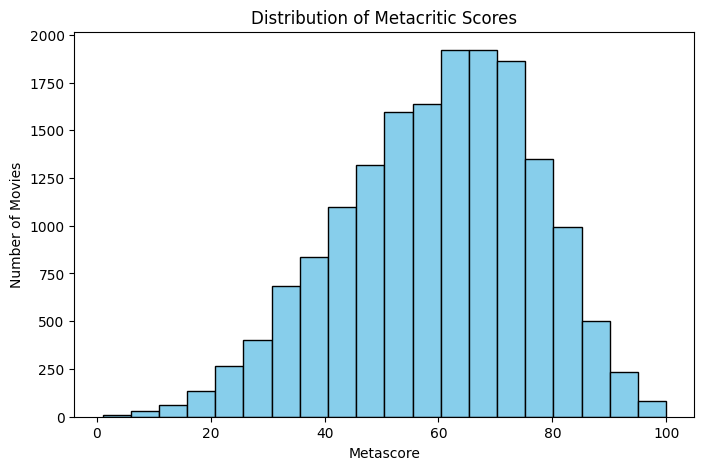

In [19]:
plt.figure(figsize=(8,5))
plt.hist(df['metascore'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Metascore")
plt.ylabel("Number of Movies")
plt.title("Distribution of Metacritic Scores")
plt.show()


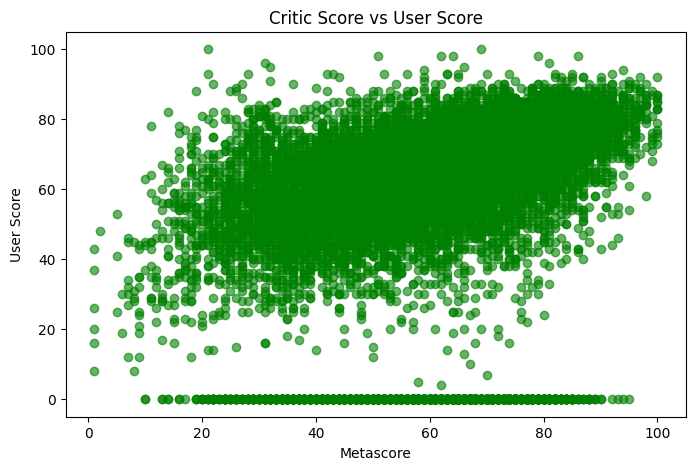

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(df['metascore'], df['userscore'], color='green', alpha=0.6)
plt.xlabel("Metascore")
plt.ylabel("User Score")
plt.title("Critic Score vs User Score")
plt.show()


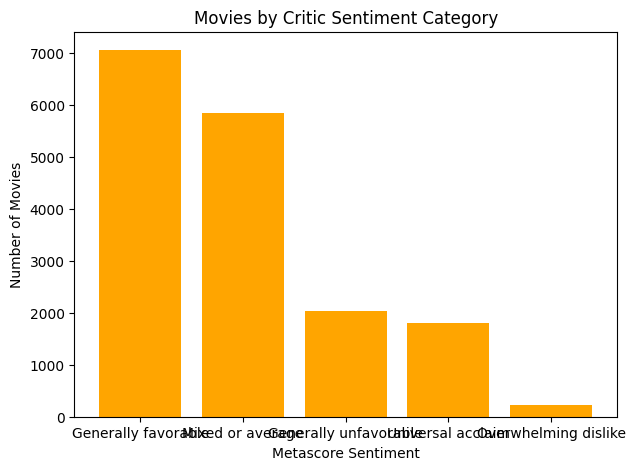

In [21]:
sentiment_counts = df['metascore_sentiment'].value_counts()

plt.figure(figsize=(7,5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='orange')
plt.xlabel("Metascore Sentiment")
plt.ylabel("Number of Movies")
plt.title("Movies by Critic Sentiment Category")
plt.show()


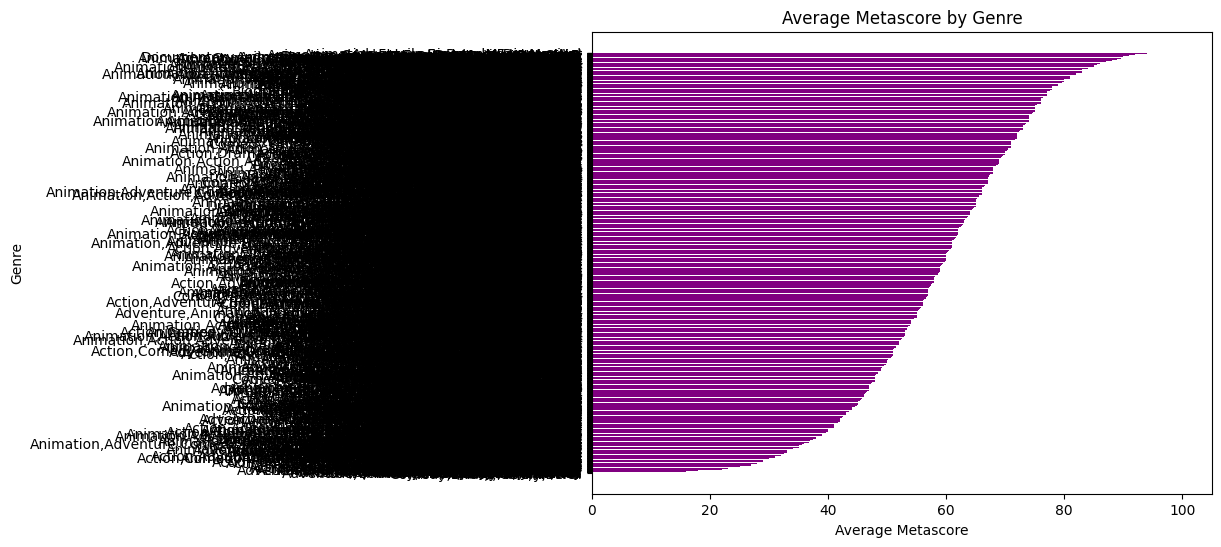

In [22]:
genre_scores = df.groupby('genres')['metascore'].mean().sort_values()

plt.figure(figsize=(8,6))
plt.barh(genre_scores.index, genre_scores.values, color='purple')
plt.xlabel("Average Metascore")
plt.ylabel("Genre")
plt.title("Average Metascore by Genre")
plt.show()


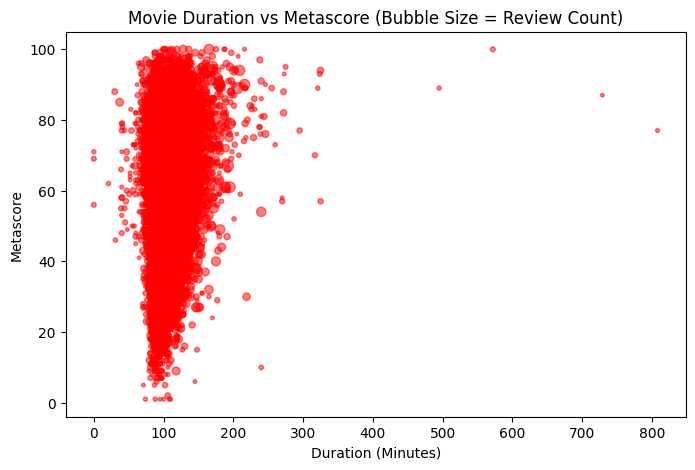

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(
    df['duration'],
    df['metascore'],
    s=df['metascore_count'],
    color='red',
    alpha=0.5
)
plt.xlabel("Duration (Minutes)")
plt.ylabel("Metascore")
plt.title("Movie Duration vs Metascore (Bubble Size = Review Count)")
plt.show()


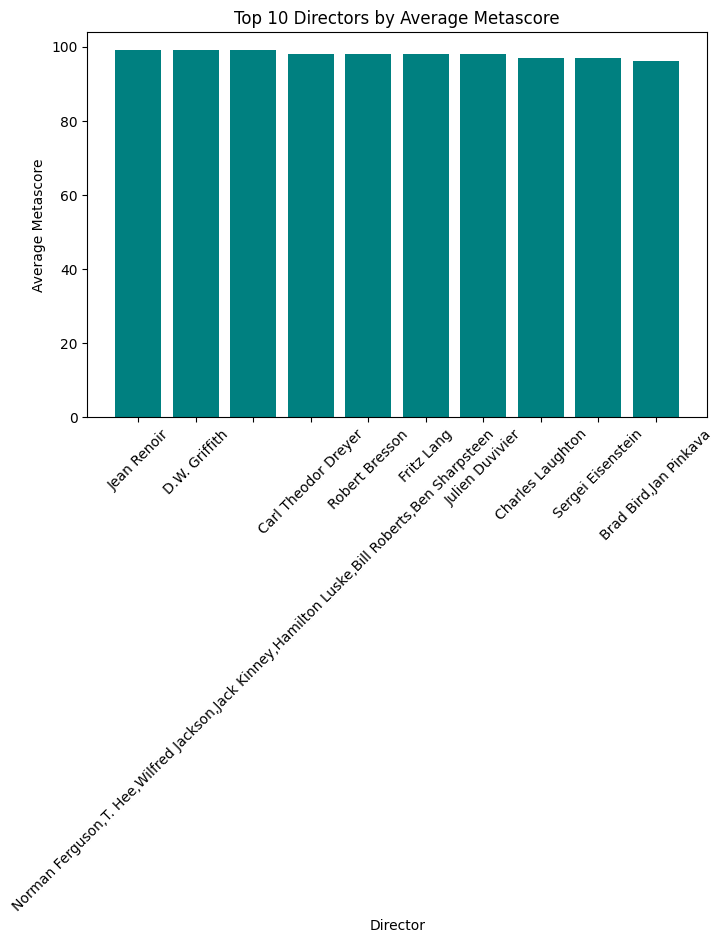

In [24]:
director_scores = df.groupby('director')['metascore'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.bar(director_scores.index, director_scores.values, color='teal')
plt.xlabel("Director")
plt.ylabel("Average Metascore")
plt.title("Top 10 Directors by Average Metascore")
plt.xticks(rotation=45)
plt.show()


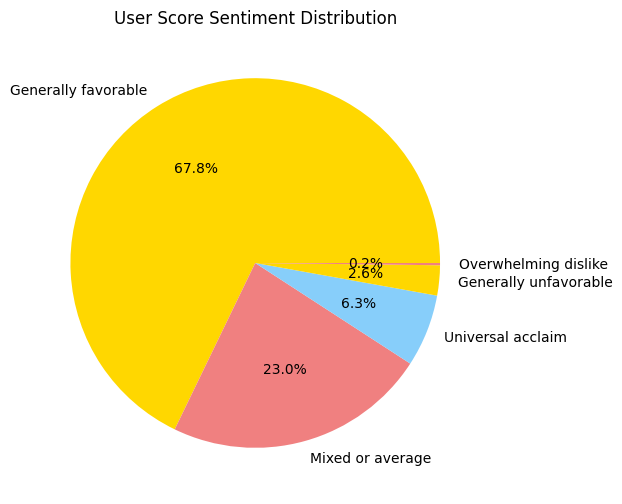

In [25]:
usersent_counts = df['userscore_sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    usersent_counts.values,
    labels=usersent_counts.index,
    autopct='%1.1f%%',
    colors=['gold', 'lightcoral', 'lightskyblue']
)
plt.title("User Score Sentiment Distribution")
plt.show()


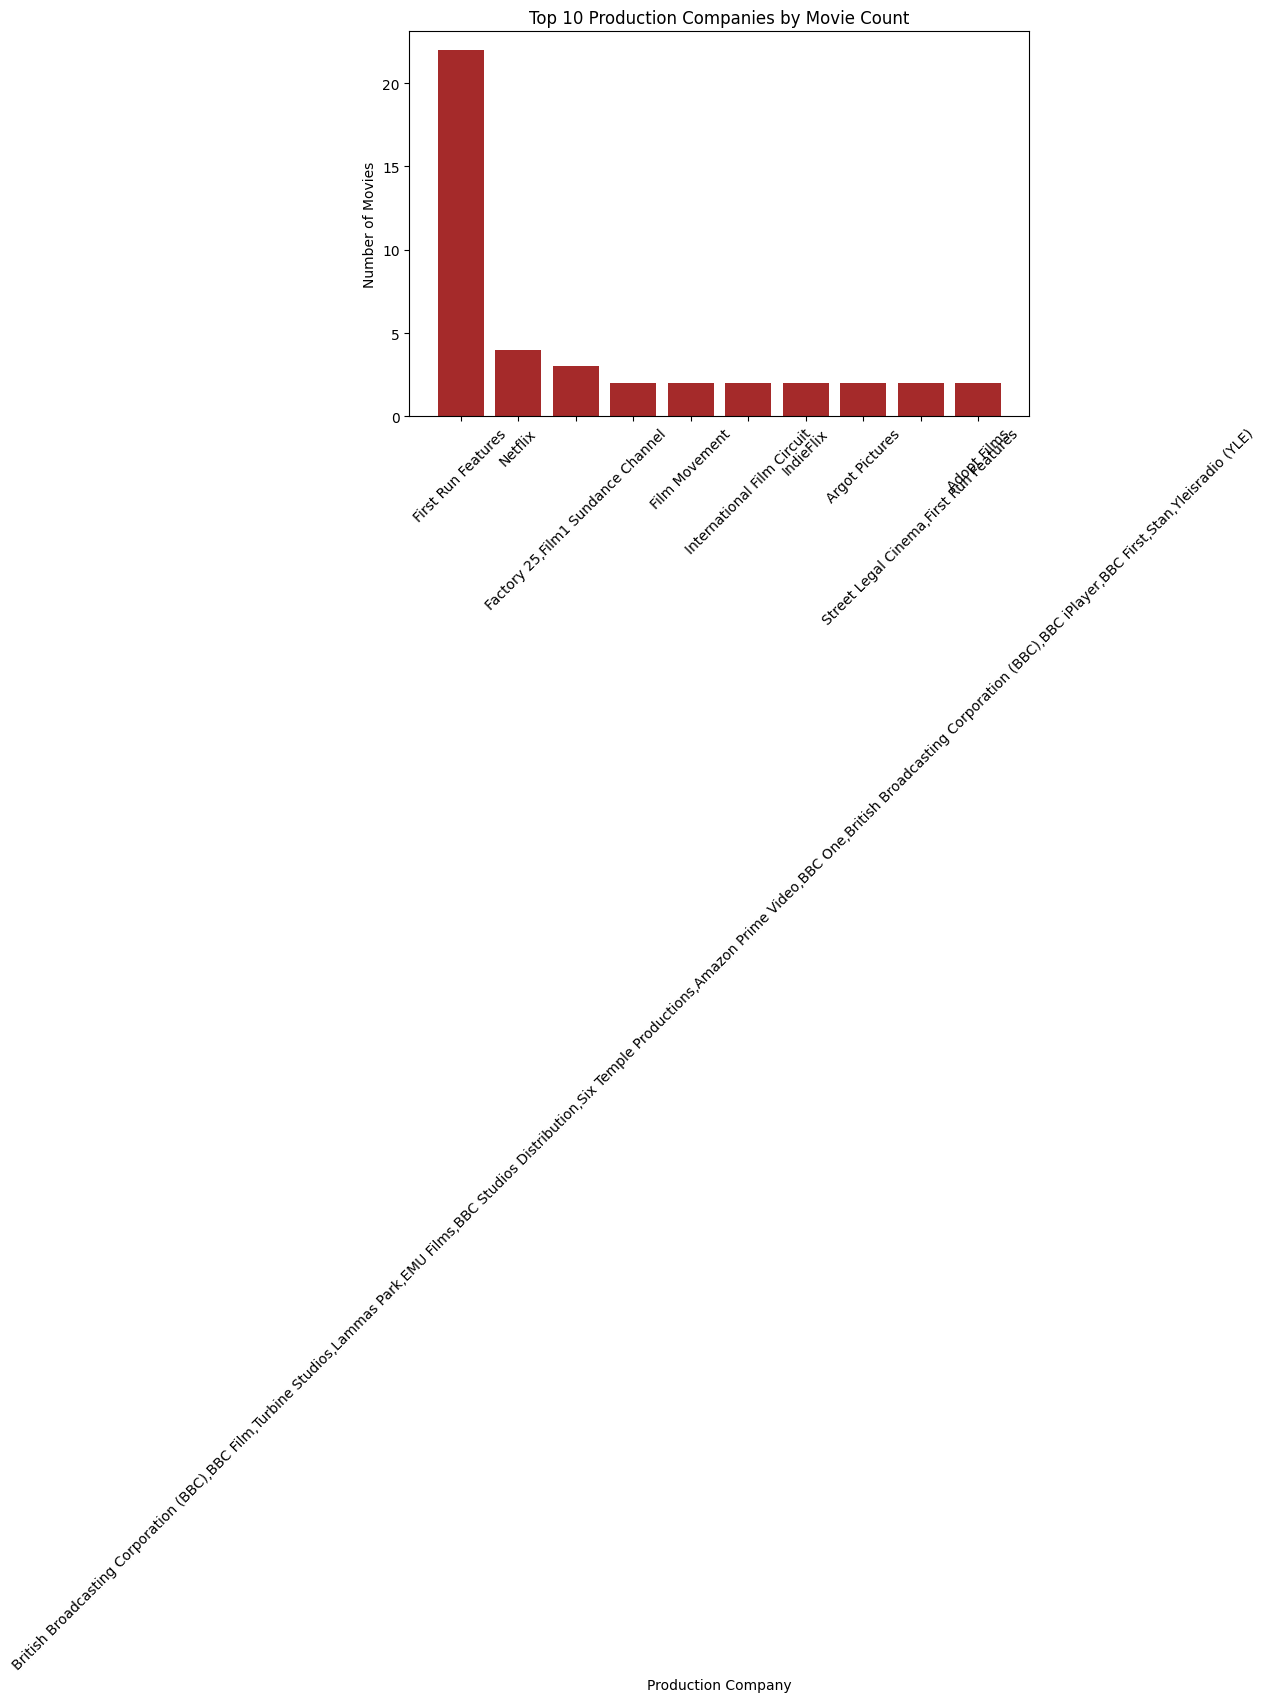

In [26]:
prod_counts = df['production_companies'].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.bar(prod_counts.index, prod_counts.values, color='brown')
plt.xlabel("Production Company")
plt.ylabel("Number of Movies")
plt.title("Top 10 Production Companies by Movie Count")
plt.xticks(rotation=45)
plt.show()


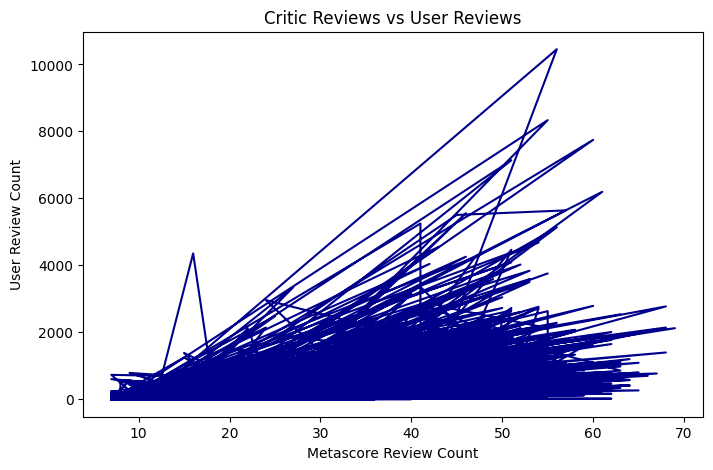

In [27]:
plt.figure(figsize=(8,5))
plt.plot(df['metascore_count'], df['userscore_count'], color='darkblue')
plt.xlabel("Metascore Review Count")
plt.ylabel("User Review Count")
plt.title("Critic Reviews vs User Reviews")
plt.show()


## ML Algo


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



In [29]:
# Fill numerical columns with median
num_cols = ['duration', 'userscore', 'userscore_count', 'metascore_count']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = ['rating', 'genres', 'userscore_sentiment', 'metascore_sentiment']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [30]:
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [31]:
X = df[
    ['rating', 'genres', 'duration', 'userscore',
     'userscore_count', 'userscore_sentiment', 'metascore_count']
]

y = df['metascore_sentiment']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 13551
Testing samples: 3388


In [33]:
models = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=5000))
    ]),
    
    "Support Vector Machine": Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVC())
    ]),
    
    "K-Nearest Neighbors": Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier())
    ]),
    
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}


In [34]:
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_results[name] = accuracy_score(y_test, y_pred) * 100


In [35]:
accuracy_df = pd.DataFrame({
    "Model": accuracy_results.keys(),
    "Accuracy (%)": accuracy_results.values()
}).sort_values(by="Accuracy (%)", ascending=False)

print(accuracy_df)


                    Model  Accuracy (%)
4           Random Forest     51.180638
1  Support Vector Machine     50.855962
0     Logistic Regression     46.782763
2     K-Nearest Neighbors     46.546635
5             Naive Bayes     42.857143
3           Decision Tree     41.942149


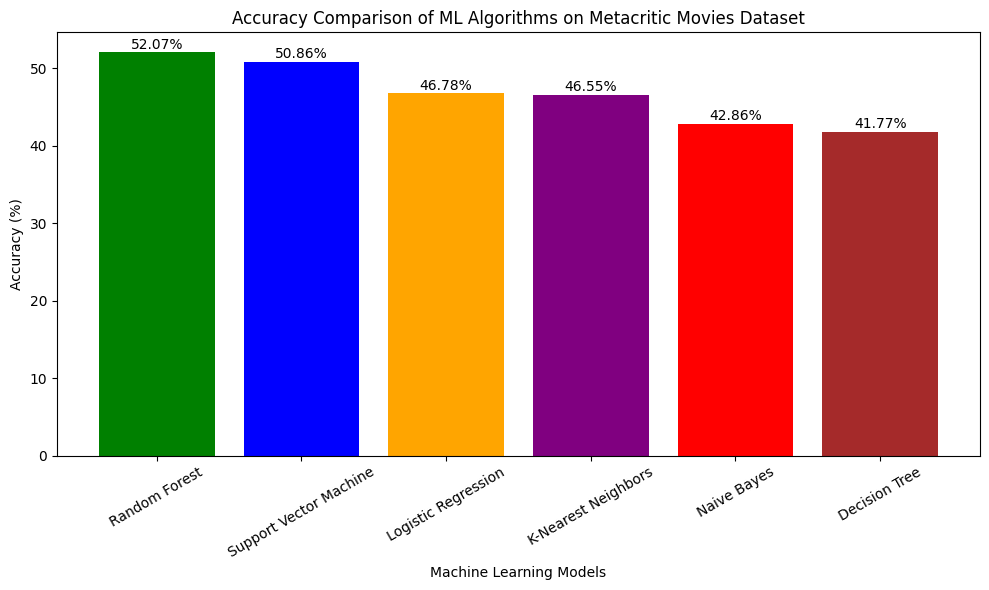

In [36]:
# Model accuracy data
models = [
    "Random Forest",
    "Support Vector Machine",
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Naive Bayes",
    "Decision Tree"
]

accuracies = [
    52.066116,
    50.855962,
    46.782763,
    46.546635,
    42.857143,
    41.765053
]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=[
    'green', 'blue', 'orange', 'purple', 'red', 'brown'
])

# Labels and title
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of ML Algorithms on Metacritic Movies Dataset")

# Rotate x labels for readability
plt.xticks(rotation=30)

# Show values on top of bars
for i, value in enumerate(accuracies):
    plt.text(i, value + 0.5, f"{value:.2f}%", ha='center')

plt.tight_layout()
plt.show()

## Thank you....pls upvote!!!!